In [1]:
# 数据对齐是个问题
# 成交量和价格的积

# 不同频率的时间序列
# resample和reindex
# pct_change
# cumprod
import pandas as pd
import numpy as np

In [15]:
prices = pd.read_csv('d:/project/ml/python/pydata-book-master/ch11/stock_px.csv', parse_dates=True, index_col=0)
volume = pd.read_csv('d:/project/ml/python/pydata-book-master/ch11/volume.csv', parse_dates=True, index_col=0)
prices.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


In [16]:
volume.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,2185600.0,4193200.0,14457600.0,6903600.0,5942400.0,89193600.0,2954400.0,154580000.0,2916400.0
1990-02-02,3103200.0,4248800.0,15302400.0,6064400.0,4732800.0,71395200.0,2424000.0,164400000.0,4250000.0
1990-02-05,1792800.0,3653200.0,9134400.0,5299200.0,3950400.0,59731200.0,2225400.0,130950000.0,5880800.0
1990-02-06,2205600.0,2640000.0,14389200.0,10808000.0,3761600.0,81964800.0,3270000.0,134070000.0,4750800.0
1990-02-07,3592800.0,11180800.0,18704400.0,12057600.0,5458400.0,134150400.0,4332600.0,186710000.0,4124800.0


In [18]:
(prices*volume).head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,10884288.0,32958552.0,41493312.0,115911444.0,25374048.0,45488736.0,17844576.0,5.082436e+10,17848368.0
1990-02-02,15640128.0,33990400.0,43917888.0,102427716.0,20682336.0,36411552.0,14762160.0,5.440325e+10,26520000.0
1990-02-05,9089496.0,29883176.0,26215728.0,91782144.0,17144736.0,30462912.0,13463670.0,4.345576e+10,36755000.0
1990-02-06,11050056.0,21436800.0,41440896.0,189788480.0,16250112.0,41802048.0,20110500.0,4.419752e+10,29597484.0
1990-02-07,18107712.0,86874816.0,54429804.0,216192768.0,23907792.0,68416704.0,26732142.0,6.231446e+10,26109984.0


In [21]:
vwamp = (prices*volume).sum()/volume.sum()
vwamp

AA        17.084474
AAPL      81.246271
GE        18.205646
IBM       61.333701
JNJ       40.576111
MSFT      16.923765
PEP       38.953033
SPX     1134.418556
XOM       50.520303
dtype: float64

In [4]:
price_a = prices['AAPL']
price_a[-5:]

2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Name: AAPL, dtype: float64

In [5]:
price_a[:5]

1990-02-01    7.86
1990-02-02    8.00
1990-02-05    8.18
1990-02-06    8.12
1990-02-07    7.77
Name: AAPL, dtype: float64

In [7]:
price_a['2011-10-03']/price_a['2011-3-01']-1

0.072399874037388123

In [9]:
returns = price_a.pct_change()
returns.tail()

2011-10-10    0.051406
2011-10-11    0.029526
2011-10-12    0.004747
2011-10-13    0.015515
2011-10-14    0.033225
Name: AAPL, dtype: float64

In [10]:
ret_index = (1+returns).cumprod()
ret_index[0] = 1
ret_index.tail()

2011-10-10    49.466921
2011-10-11    50.927481
2011-10-12    51.169211
2011-10-13    51.963104
2011-10-14    53.689567
Name: AAPL, dtype: float64

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250).corr(other=<Series>)


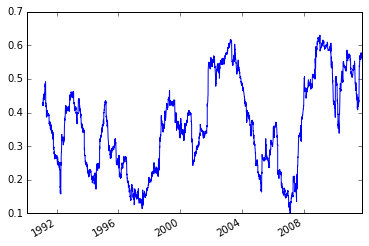

In [13]:
# dynamic model
# moving window
# correlation
aapl_rets = price['AAPL'].pct_change()
msft_rets=price['MSFT'].pct_change()
%matplotlib inline
pd.rolling_corr(aapl_rets, msft_rets, 250).plot()